In [3]:
import numpy as np
import scipy.optimize as sopt
import matplotlib.pyplot as plt
import pandas as pd
import pydae.ssa as ssa

In [4]:
from cigre_eur_lv_res_bpu_iso import cigre_eur_lv_res_bpu_iso_class

In [333]:
grid = cigre_eur_lv_res_bpu_iso_class()

In [334]:
grid.initialize([{'S_n_R10':150e3,'S_n_R14':150e3,
                  'K_delta_R10':1e-10,'K_delta_R14':1e-10,
                  'K_a_R10':100,'K_a_R14':100,
                  'H_R10':2,'H_R14':2,
                  'v_ref_R10':1.0, 'v_ref_R14':1.0,
                  'T_m_R10':1,'T_m_R14':1}],
                   1,compile=True)
print(f"p_g_R10_1 = {grid.get_value('p_g_R10_1'):0.3f}, q_g_R10_1 = {grid.get_value('q_g_R10_1'):0.3f}")
print(f"p_g_R14_1 = {grid.get_value('p_g_R14_1'):0.3f}, q_g_R14_1 = {grid.get_value('q_g_R14_1'):0.3f}")
print(f"v_ref_R10 = {grid.get_value('v_ref_R10'):0.4f}, v_ref_R14 = {grid.get_value('v_ref_R14'):0.4f}")

p_g_R10_1 = 0.647, q_g_R10_1 = 1.234
p_g_R14_1 = 0.649, q_g_R14_1 = -0.808
v_ref_R10 = 1.0000, v_ref_R14 = 1.0000


In [346]:
grid = cigre_eur_lv_res_bpu_iso_class()
grid.initialize([{'S_n_R10':150e3,'S_n_R14':150e3,
                  'K_delta_R10':1e-10,'K_delta_R14':1e-10,
                  'K_a_R10':100,'K_a_R14':100,
                  'H_R10':2,'H_R14':2,
                  'v_ref_R10':1.0, 'v_ref_R14':1.0,
                  'T_m_R10':1,'T_m_R14':1}],
                   1,compile=True)
Δt = 0.1
times = np.arange(0,40,Δt)
p_R10_f,p_R14_f = 0,0
V_droop = 50e-3
for t in times:
    
    p_R10 = grid.get_value('p_g_R10_1')
    p_R14 = grid.get_value('p_g_R14_1')
    p_R10_f = p_R10_f + Δt/5*(p_R10 - p_R10_f)
    p_R14_f = p_R14_f + Δt/5*(p_R14 - p_R14_f)
    grid.set_values({'v_ref_R10':1-p_R10_f*V_droop,
                     'v_ref_R14':1-p_R14_f*V_droop})
    
    grid.run([{'t_end':t}])  # simulation until t(k+1) =  Δt + t(k) with the updated f_x force 
    
grid.post();  # required post processing
print(f"p_g_R10_1 = {grid.get_value('p_g_R10_1'):0.3f}, q_g_R10_1 = {grid.get_value('q_g_R10_1'):0.3f}")
print(f"p_g_R14_1 = {grid.get_value('p_g_R14_1'):0.3f}, q_g_R14_1 = {grid.get_value('q_g_R14_1'):0.3f}")
print(f"v_ref_R10 = {grid.get_value('v_ref_R10'):0.4f}, v_ref_R14 = {grid.get_value('v_ref_R14'):0.4f}")

LinAlgError: Matrix is singular to machine precision.

In [ ]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('p_g_R10_1'))
axes.plot(grid.T,grid.get_values('p_g_R14_1'))
axes.plot(grid.T,grid.get_values('q_g_R10_1'))
axes.plot(grid.T,grid.get_values('q_g_R14_1'))

In [214]:
grid.ss()

In [215]:
grid.initialization_tol = 1e-8
def obj_eval(x):
    grid.set_values({'v_ref_R10':1+x[0],'v_ref_R14':1+x[1]})
    grid.ss()
    q = grid.get_value('q_g_R10_1')**2 + grid.get_value('q_g_R14_1')**2
    return q
sol = sopt.minimize(obj_eval,[0]*2,method='Powell',bounds=[(-1e-2,1e-2)]*2) # SLSQP, Powell
sol

   direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [-2.72636111e-06, -2.83436663e-08]])
     fun: 0.14095258930446952
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 2
  status: 0
 success: True
       x: array([-8.78002105e-04, -1.18371750e-05])

In [216]:
print(f"p_g_R10_1 = {grid.get_value('p_g_R10_1'):0.3f}")
print(f"q_g_R10_1 = {grid.get_value('q_g_R10_1'):0.3f}")
print(f"p_g_R14_1 = {grid.get_value('p_g_R14_1'):0.3f}")
print(f"q_g_R14_1 = {grid.get_value('q_g_R14_1'):0.3f}")

p_g_R10_1 = 0.808
q_g_R10_1 = 0.265
p_g_R14_1 = 0.808
q_g_R14_1 = 0.265


In [217]:
print(grid.get_value('v_ref_R10'))
print(grid.get_value('v_ref_R14'))

0.9991219979857963
0.9999881628259191


In [315]:
ssa.eval_A(grid)
ssa.damp_report(grid)

,Real,Imag,Freq.,Damp
Mode 1,-3.332445e-01,12.698590,2.021043,0.026234
Mode 2,-3.332445e-01,-12.698590,2.021043,0.026234
Mode 3,-3.788382e+00,10.664396,1.697291,0.334743
Mode 4,-3.788382e+00,-10.664396,1.697291,0.334743
Mode 5,-9.980450e+00,0.000000,0.000000,1.000000
Mode 6,-8.688273e+00,0.000000,0.000000,1.000000
Mode 7,-5.115266e+00,0.000000,0.000000,1.000000
Mode 8,-9.875932e-01,0.000000,0.000000,1.000000
Mode 9,-4.999875e-01,2.179447,0.346870,0.223602
Mode 10,-4.999875e-01,-2.179447,0.346870,0.223602


In [212]:
ssa.participation(grid).abs().round(2)

,Mode 1,Mode 2,Mode 3,Mode 4,Mode 5,Mode 6,Mode 7,Mode 8,Mode 9,Mode 10,Mode 11,Mode 12,Mode 13,Mode 14,Mode 15
delta_R10,0.04,0.04,0.21,0.21,0.00,0.00,0.07,0.07,0.02,0.00,0.00,0.0,0.5,0.00,0.00
omega_R10,0.04,0.04,0.22,0.22,0.00,0.00,0.05,0.05,0.00,0.26,0.26,0.0,0.0,0.00,0.00
e1q_R10,0.29,0.29,0.54,0.54,0.00,0.01,1.03,1.16,0.04,0.00,0.00,0.0,0.0,0.00,0.00
e1d_R10,0.00,0.00,0.05,0.05,0.00,0.92,0.01,0.12,0.00,0.00,0.00,0.0,0.0,0.00,0.00
v_c_R10,0.29,0.29,0.47,0.47,0.35,0.00,0.27,0.48,0.00,0.00,0.00,0.0,0.0,0.00,0.00
xi_v_R10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.62,0.38
p_m_R10,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.05,0.45,0.26,0.26,0.0,0.0,0.00,0.00
delta_R14,0.04,0.04,0.21,0.21,0.00,0.00,0.07,0.07,0.02,0.00,0.00,0.0,0.5,0.00,0.00
omega_R14,0.04,0.04,0.22,0.22,0.00,0.00,0.04,0.04,0.00,0.25,0.25,0.0,0.0,0.00,0.00
e1q_R14,0.14,0.14,0.44,0.44,0.00,0.00,1.53,0.82,0.00,0.00,0.00,0.0,0.0,0.00,0.00


In [219]:
grid.simulate([{'t_end':1.0, 'P_R18':-44650.00},
               {'t_end':15.0, 'P_R18':-44650.00*1.1 }],1)

(array([[0.000e+00],
        [1.000e-03],
        [1.000e-02],
        ...,
        [1.497e+01],
        [1.498e+01],
        [1.499e+01]]),
 array([[ 5.72861588e-04,  1.00000000e+00,  9.51520163e-01, ...,
          2.07400545e+06,  8.09764124e-01,  2.19528247e+02],
        [ 5.72861588e-04,  1.00000000e+00,  9.51520163e-01, ...,
          2.07400545e+06,  8.09764124e-01,  2.19528247e+02],
        [ 5.72861587e-04,  1.00000000e+00,  9.51520163e-01, ...,
          2.07400545e+06,  8.09764124e-01,  2.19528247e+02],
        ...,
        [-3.13369898e-03,  9.99067005e-01,  9.52312854e-01, ...,
          2.07400545e+06,  8.28460920e-01,  2.19542058e+02],
        [-3.13388063e-03,  9.99066988e-01,  9.52313019e-01, ...,
          2.07400545e+06,  8.28460600e-01,  2.19542068e+02],
        [-3.13406174e-03,  9.99066971e-01,  9.52313184e-01, ...,
          2.07400545e+06,  8.28460287e-01,  2.19542077e+02]]),
 array([[ 0.99903935, -0.75697202,  0.99903935, ...,  1.        ,
          0.10976412, 

In [220]:
grid.report_u()

P_R01 =  0.00
Q_R01 =  0.00
P_R02 =  0.00
Q_R02 =  0.00
P_R03 =  0.00
Q_R03 =  0.00
P_R04 =  0.00
Q_R04 =  0.00
P_R05 =  0.00
Q_R05 =  0.00
P_R06 =  0.00
Q_R06 =  0.00
P_R07 =  0.00
Q_R07 =  0.00
P_R08 =  0.00
Q_R08 =  0.00
P_R09 =  0.00
Q_R09 =  0.00
P_R10 =  0.00
Q_R10 =  0.00
P_R11 = -14250.00
Q_R11 = -4683.75
P_R12 =  0.00
Q_R12 =  0.00
P_R13 =  0.00
Q_R13 =  0.00
P_R14 =  0.00
Q_R14 =  0.00
P_R15 = -49400.00
Q_R15 = -16237.00
P_R16 = -52250.00
Q_R16 = -17173.74
P_R17 = -33250.00
Q_R17 = -10928.75
P_R18 = -49115.00
Q_R18 = -14675.75
v_ref_R10 =  1.00
v_pss_R10 =  0.00
p_c_R10 =  0.70
v_ref_R14 =  1.00
v_pss_R14 =  0.00
p_c_R14 =  0.70


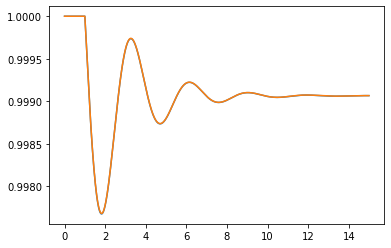

In [221]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('omega_R10'))
axes.plot(grid.T,grid.get_values('omega_R14'))